In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

## Sparsity Percent Line Plot

In [24]:
# Load the data from CSV
df = pd.read_csv('Sparsity_Cityscapes_ACDC_perc.csv')

# Display first few rows
print("First few rows of the data:")
print(df.head(10))
print("\nData shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

First few rows of the data:
  Architecture    Preprocessing     Sparsity   mIoU  mIoU_var   mAcc  \
0   Deeplabv3+                -            -   8.01      0.45  18.14   
1   Deeplabv3+        grayscale            -  19.76      0.53  34.13   
2   Deeplabv3+  color-opponency            -  18.05      1.55  31.73   
3   Deeplabv3+     single-color            -  19.75      1.99  32.24   
4   Deeplabv3+        grayscale  percent_90%  16.35      1.54  26.35   
5   Deeplabv3+  color-opponency  percent_90%  20.81      0.26  32.21   
6   Deeplabv3+     single-color  percent_90%  15.82      0.69  25.46   
7   Deeplabv3+        grayscale  percent_80%  17.52      1.21  26.65   
8   Deeplabv3+  color-opponency  percent_80%  21.61      0.39  33.73   
9   Deeplabv3+     single-color  percent_80%  19.30      0.63  30.72   

   mAcc_var   aAcc  aAcc_var  
0      2.24  31.94      2.20  
1      1.05  58.90      1.33  
2      2.54  53.51      3.20  
3      1.17  54.79      2.95  
4      1.59  47.75      

In [25]:
# Filter data - remove the baseline row with no preprocessing for clearer visualization
df_filtered = df[df['Preprocessing'] != '-'].copy()

# Create a combined sparsity label for better readability
df_filtered['Sparsity_Label'] = df_filtered['Sparsity'].fillna('No Sparsity')
df_filtered['Sparsity_Label'] = df_filtered['Sparsity_Label'].replace('-', 'No Sparsity')

print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {df_filtered.shape}")
print(f"\nUnique preprocessing methods: {df_filtered['Preprocessing'].unique()}")
print(f"Unique sparsity levels: {df_filtered['Sparsity_Label'].unique()}")

Original data shape: (22, 9)
Filtered data shape: (21, 10)

Unique preprocessing methods: ['grayscale' 'color-opponency' 'single-color']
Unique sparsity levels: ['No Sparsity' 'percent_90%' 'percent_80%' 'percent_70%' 'percent_60%'
 'percent_50%' 'percent_40%']


In [26]:
# Calculate confidence bounds for error bands
df_filtered['mIoU_lower'] = df_filtered['mIoU'] - df_filtered['mIoU_var']
df_filtered['mIoU_upper'] = df_filtered['mIoU'] + df_filtered['mIoU_var']


# Sort by preprocessing and sparsity for better visualization
sparsity_order_perc = ['No Sparsity', 'percent_40%', 'percent_50%', 'percent_60%', 'percent_70%', 
                  'percent_80%', 'percent_90%']


# Create a numeric index for sparsity levels for x-axis
df_filtered['sparsity_numeric'] = df_filtered['Sparsity_Label'].apply(
    lambda x: sparsity_order_perc.index(x) if x in sparsity_order_perc else -1
)

print("Data prepared for visualization:")
print(df_filtered[['Preprocessing', 'Sparsity_Label', 'mIoU', 'mIoU_var', 'mIoU_lower', 'mIoU_upper']].head(10))

Data prepared for visualization:
      Preprocessing Sparsity_Label   mIoU  mIoU_var  mIoU_lower  mIoU_upper
1         grayscale    No Sparsity  19.76      0.53       19.23       20.29
2   color-opponency    No Sparsity  18.05      1.55       16.50       19.60
3      single-color    No Sparsity  19.75      1.99       17.76       21.74
4         grayscale    percent_90%  16.35      1.54       14.81       17.89
5   color-opponency    percent_90%  20.81      0.26       20.55       21.07
6      single-color    percent_90%  15.82      0.69       15.13       16.51
7         grayscale    percent_80%  17.52      1.21       16.31       18.73
8   color-opponency    percent_80%  21.61      0.39       21.22       22.00
9      single-color    percent_80%  19.30      0.63       18.67       19.93
10        grayscale    percent_70%  19.40      1.08       18.32       20.48


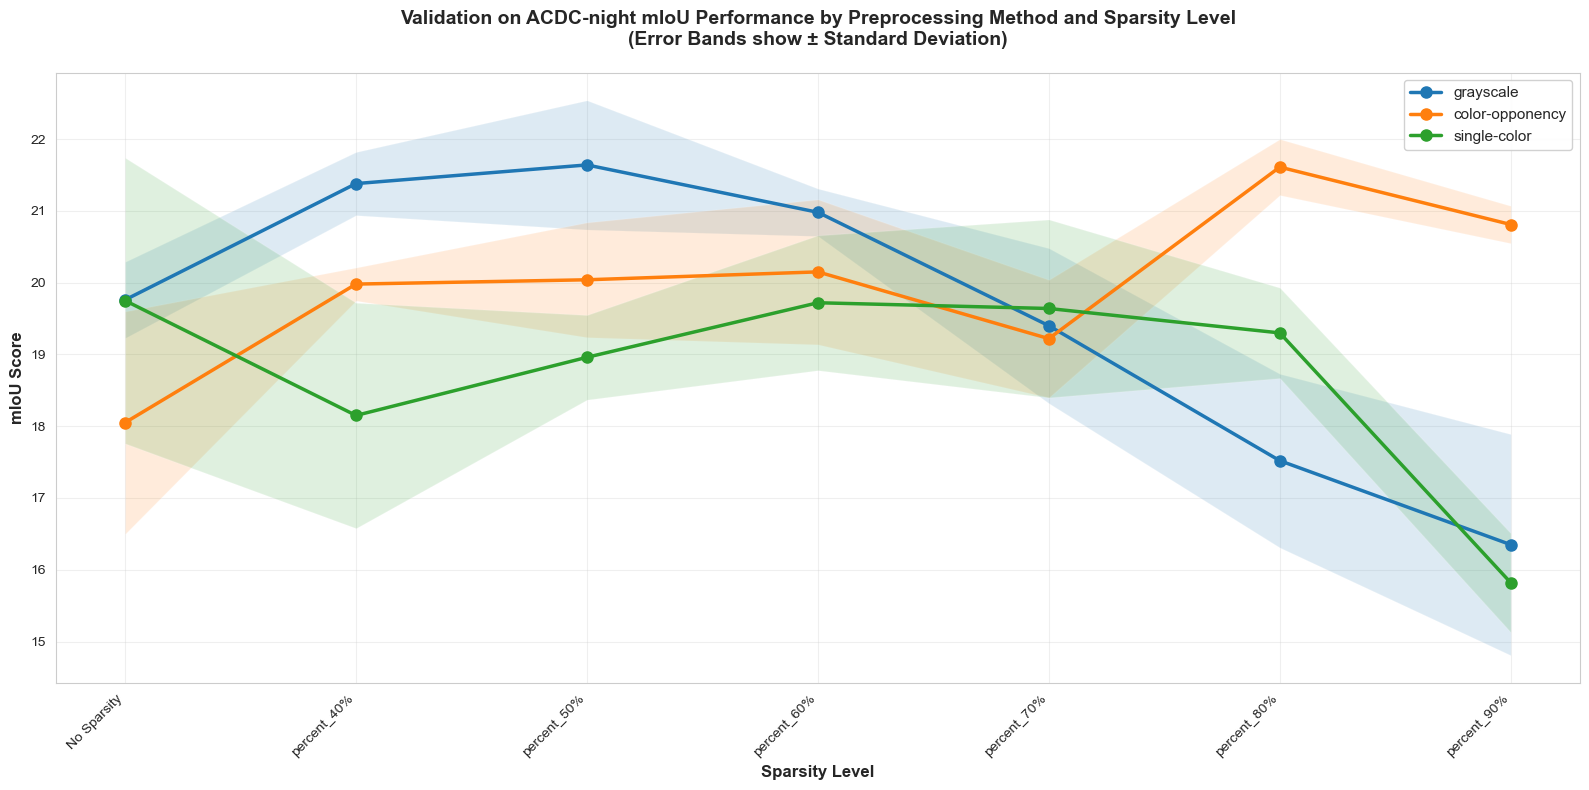

Visualization complete!


In [28]:
# Create the lineplot with error bands
fig, ax = plt.subplots(figsize=(16, 8))

# Plot lines and markers for each preprocessing method
for preprocessing in df_filtered['Preprocessing'].unique():
    data_subset = df_filtered[df_filtered['Preprocessing'] == preprocessing].sort_values('sparsity_numeric')
    # Plot main line
    ax.plot(data_subset['sparsity_numeric'], data_subset['mIoU'], 
            marker='o', label=preprocessing, linewidth=2.5, markersize=8)
    
    # Add error bands
    ax.fill_between(data_subset['sparsity_numeric'], 
                    data_subset['mIoU_lower'], 
                    data_subset['mIoU_upper'], 
                    alpha=0.15)
    


# Customize the plot
ax.set_xlabel('Sparsity Level', fontsize=12, fontweight='bold')
ax.set_ylabel('mIoU Score', fontsize=12, fontweight='bold')
ax.set_title('Validation on ACDC-night mIoU Performance by Preprocessing Method and Sparsity Level\n(Error Bands show ± Standard Deviation)', 
             fontsize=14, fontweight='bold', pad=20)

# Set x-axis labels
ax.set_xticks(range(len(sparsity_order_perc)))
ax.set_xticklabels(sparsity_order_perc, rotation=45, ha='right')

ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Visualization complete!")